# **Ejemplo 1. Clasificando Iris dataset**

https://archive.ics.uci.edu/ml/datasets/Iris

Empezamos por importar las librerías necesarias:

In [1]:
import pandas as pd

Ahora importamos el dataset iris desde el repositorio de la uci:

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columnNames = ['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm','species']
df = pd.read_csv(url,names=columnNames)
df.head()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocesamiento

En la etapa de preprosamiento, hemos de preparar nuestro conjunto de datos de entrenamiento y prueba pero también vamos a realizar un escalamiento a los datos (usualmente conocido como normalización o estandarización según sea el caso).

In [3]:
X = df[['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm']]
y = df[['species']]
y.head() # 'y' contiene la columna 'species' que es la clase. 

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Como se aprecia arriba, **y** contiene datos categoricos pero las redes neuronales ocupan de datos numéricos por lo que hay que hacer una conversión, por ejemplo: Iris-setosa = 0, Iris-versicolor = 1 e Iris-virginica = 2. Scikit-learn incluye una clase para realizar dicha tarea: LabelEncoder.

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.species.unique() # imprimir valores de 'y' no repetidos

array([0, 1, 2])

Ahora procedemos a formar nuestros conjuntos de **entrenamiento** y **prueba**:

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30)

En ocasiones, los atributos de nuestro conjunto de datos presentan un rango de valores muy amplio e incluso unidades diferentes. Por lo general, los algoritmos de Inteligencia artificial son sensibles a esta variación en los datos por lo que se recomienda a escalarlos a un rango de valores más pequeños como [0,1] ó [-1,1]. Scikit-learn incluye una clase para realizar esto facilmente:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

# Entrenamiento

Procedemos a entrenar nuestra red neuronal haciendo uso de la clase MLPClassifier:

In [7]:
from sklearn.neural_network import MLPClassifier

rna = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
rna.fit(train_X,train_y.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Predicciones

Una vez entrenada nuestra red neuronal, podemos usarla para hacer predicciones sobre nuestro conjunto de prueba:

In [8]:
predicciones = rna.predict(test_X)
print("Resultado obtenido = ",predicciones)
print("Resultado esperado = ",test_y.values.ravel())

Resultado obtenido =  [2 1 2 1 1 1 0 1 1 0 2 1 1 2 0 1 0 0 2 2 0 1 0 1 0 2 0 0 1 1 2 2 2 1 0 2 2
 2 1 0 1 2 0 1 0]
Resultado esperado =  [2 1 2 1 1 1 0 1 1 0 2 1 1 2 0 1 0 0 2 2 0 1 0 1 0 2 0 0 1 1 2 2 2 1 0 2 2
 2 1 0 1 2 0 2 0]


# Evaluación

Procedemos a evaluar la red neuronal:

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(test_y.values.ravel(), predicciones) # (valores esperados,valores obtenidos)
print("Exactitud : %0.1f%% " % (accuracy * 100))

Exactitud : 97.8% 


Matriz de confusión:

In [10]:
pd.DataFrame(confusion_matrix(test_y, predicciones))

,0,1,2
0,14,0,0
1,0,16,0
2,0,1,14


Graficar la pérdida de nuestro modelo:

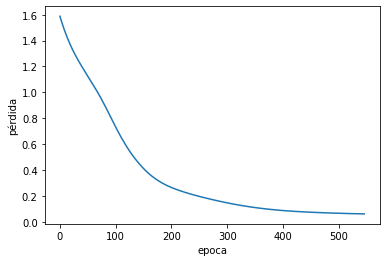

In [11]:
import matplotlib.pyplot as plt

loss_values = rna.loss_curve_
plt.xlabel("epoca")
plt.ylabel("pérdida")
plt.plot(loss_values)
plt.show()